Attmepting to compute julia set and fatou basins separately.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import os

In [3]:
f = lambda x, c: x*x + c
c = -1
c = -0.12256 + 0.74486j #Duoady Rabbit
# c = -0.75 + 0.11j
# c = -0.835 - 0.321j
# c = 0.3887 - 0.2158j
res = 200
max_iter = 3000
xlim = 2
ylim = 2
x = np.linspace(-xlim, xlim, res)
y = np.linspace(-ylim, ylim, res)
X,Y = np.meshgrid(x,y)
Z = X + Y*1j

In [4]:
def critical_orbit(c, N=5000, burnin=1000):
    z = 0.0 + 0.0j
    orbit = []
    for i in range(N):
        z = z*z + c
        if i >= burnin:
            orbit.append(z)
    return np.array(orbit)

def detect_cycle(orbit, tol=1e-8, max_period=20):
    L = len(orbit)
    for p in range(1, max_period + 1):
        diffs = np.abs(orbit[p:] - orbit[:-p])
        if np.all(diffs < tol):
            return p
    return None

def get_attracting_cycle(c, tol=1e-8):
    orbit = critical_orbit(c)
    p = detect_cycle(orbit, tol=tol)

    if p is None:
        return None

    cycle = orbit[-p:]
    return cycle



In [5]:
cycle = get_attracting_cycle(c)

has_cycle = (cycle is not None)
eps = 1e-6

In [6]:
bas0 = np.full(Z.shape,max_iter, dtype=int)
basInfty = np.full(Z.shape, max_iter, dtype=int)
basInfty2 = np.full(Z.shape, max_iter, dtype=int)
Z20 = Z.copy()
Z2I = Z.copy()

In [7]:

for i in range(max_iter):
    # bas0radius = np.abs(Z20 - p) >= 1e-6
    # Z20[bas0radius] = f(Z20[bas0radius],c)
    # just_escaped0 = (bas0 == max_iter ) & ((np.abs(Z20 - p) < 1e-6)) #bas0 ==max_iter condition means we havent already overwirtten the max_iter initial value #~ is bitwise NOT operator
    # bas0[just_escaped0]  = i #+ 1 - np.log(np.log(np.abs(Z20[just_escaped0])))/np.log(2)
    if has_cycle:
        # distance to nearest cycle point
        dist_to_cycle = np.min(np.abs(Z20[..., None] - cycle), axis=-1)

        still_far = dist_to_cycle >= eps
        Z20[still_far] = f(Z20[still_far], c)

        just_converged = (bas0 == max_iter) & (~still_far)
        bas0[just_converged] = i
    

    basInftyradius = np.abs(Z2I) <= 100*max_iter # may need to change this to some arbitrary large value. Must be greater than max_iter though, otehrwise points may escape prematurely
    Z2I[basInftyradius] = f(Z2I[basInftyradius],c)
    just_escapedI = (basInfty == max_iter) & (~basInftyradius) 
    basInfty[just_escapedI] = i
    basInfty2[just_escapedI] = i + 1 - np.log(np.log(np.abs(Z2I[just_escapedI])))/np.log(2)
    
#bas0 matrix
bas0Matrix = bas0.copy()
JuliaSet = (bas0 == max_iter).astype(int) #add second condition for basInfty later '& (basInfty ==max_iter)'
JuliaSet[bas0Matrix != max_iter] = 0

basInftyMatrix = basInfty.copy()
tempfilledJuliaSet = (basInftyMatrix == max_iter).astype(int)
basInftyMatrix[tempfilledJuliaSet == 1] = 0

basInftyMatrix2 = basInfty2.copy()
tempfilledJuliaSet = (basInftyMatrix2 == max_iter).astype(int)
basInftyMatrix2[tempfilledJuliaSet == 1] = 0




/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_83555/102863479.py:1: RuntimeWarning: overflow encountered in multiply
  f = lambda x, c: x*x + c
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_83555/102863479.py:1: RuntimeWarning: invalid value encountered in multiply
  f = lambda x, c: x*x + c


Save Matrices

In [8]:
# np.save(f'Matrices/bas0c={c}',bas0Matrix)
# np.save(f'Matrices/basInftyc={c}', basInftyMatrix)

In [9]:
# full_path0 = os.path.join('/Users/g_dog/Desktop/PHYS 360 Code/FractalGravity/Matrices', f'bas0c={c}.npy')
# bas0Matrix = np.load(full_path0)

# full_pathI = os.path.join('/Users/g_dog/Desktop/PHYS 360 Code/FractalGravity/Matrices', f'basInftyc={c}.npy')
# basInftyMatrix = np.load(full_pathI)

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_83555/3815111630.py:3: SyntaxWarning: invalid escape sequence '\i'
  fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ')


Text(0.5, 1.0, 'c=(-0.12256+0.74486j)')

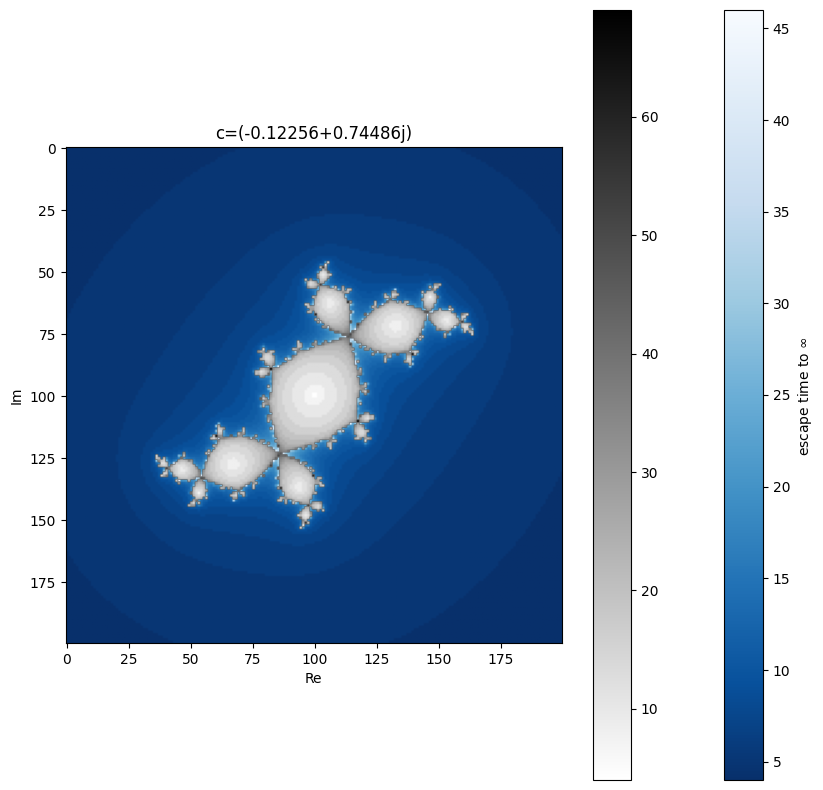

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
imI = ax.imshow(np.ma.masked_where(basInftyMatrix==0,basInftyMatrix),cmap = plt.cm.Blues_r) #cmap=plt.cm.Blues_r
fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ') 
im0 = ax.imshow(np.ma.masked_where(basInftyMatrix!=0,bas0Matrix), cmap='binary') # np.ma.masked_where(basInftyMatrix!=0,bas0Matrix) masks all the points of Bas0 that overlap on non-zero BasInfty points, then plots Bas0 over the BasInfty 0's
fig.colorbar(im0, ax=ax)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title(f'c={c}')

comparing logarithmic contour scaling with no scaling

In [11]:
# fig, ax = plt.subplots(ncols=2,  figsize=(15, 10))
# imI = ax[0].imshow(np.ma.masked_where(basInftyMatrix==0,basInftyMatrix),cmap = plt.cm.Blues_r)
# fig.colorbar(imI, ax=ax[0], label='escape time to $\infty$ ') 
# im0 = ax[0].imshow(np.ma.masked_where(basInftyMatrix!=0,bas0Matrix), cmap='binary') # np.ma.masked_where(basInftyMatrix!=0,bas0Matrix) masks all the points of Bas0 that overlap on non-zero BasInfty points, then plots Bas0 over the BasInfty 0's
# fig.colorbar(im0, ax=ax[0])
# ax[0].set_xlabel('Re')
# ax[0].set_ylabel('Im')
# ax[0].set_title(f'c={c}')


# imI = ax[1].imshow(np.ma.masked_where(basInftyMatrix2==0,basInftyMatrix2),cmap = plt.cm.Blues_r)
# fig.colorbar(imI, ax=ax[1], label='escape time to $\infty$ ') 
# im0 = ax[1].imshow(np.ma.masked_where(basInftyMatrix2!=0,bas0Matrix), cmap='binary')
# fig.colorbar(im0, ax=ax[1])
# ax[1].set_xlabel('Re')
# ax[1].set_ylabel('Im')
# ax[1].set_title(f'c={c}')
# plt.show()

create potential fields $U_0$ and $U_{\infty}$ for Basin 0 and Basin $\infty$ 

In [12]:
U0 = bas0Matrix.astype(float)
dx = dy = 1.0 #avoid physical units with 1 grid spacing 
dU0y, dU0x = np.gradient(U0, dy, dx)
F0x = dU0x # F = -grad(U), however we omit the negative as we define the field to be negative already
F0y = dU0y
magnitude0 = np.sqrt(F0y**2 + F0x**2)

UI = basInftyMatrix.astype(float)
dUIy, dUIx = np.gradient(UI, dy, dx)
FIx = dUIx # F = -grad(U), however we omit the negative as we define the field to be negative already
FIy = dUIy
magnitudeI = np.sqrt(F0y**2 + F0x**2)


plot potentials on existing matrices

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_83555/3559884449.py:3: SyntaxWarning: invalid escape sequence '\i'
  fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ')


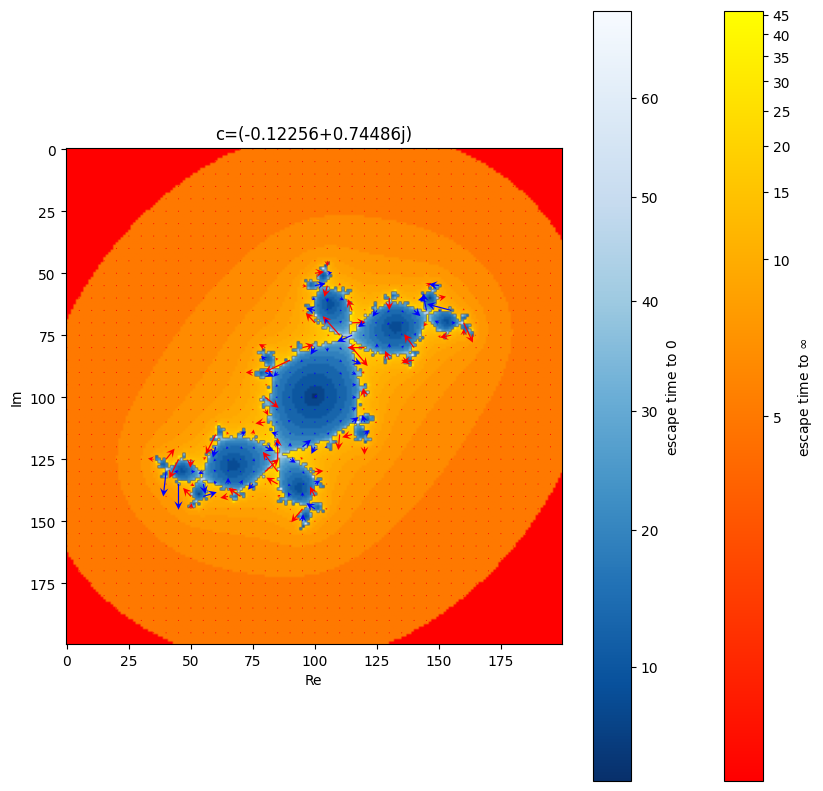

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
imI = ax.imshow(np.ma.masked_where(basInftyMatrix==0,basInftyMatrix),cmap=plt.cm.autumn, norm=colors.PowerNorm(gamma=0.2)) #cmap=plt.cm.Blues_r norm=colors.PowerNorm(gamma=2)
fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ') 
im0 = ax.imshow(np.ma.masked_where(basInftyMatrix!=0,bas0Matrix), cmap=plt.cm.Blues_r, norm=colors.PowerNorm(gamma=0.8)) # np.ma.masked_where(basInftyMatrix!=0,bas0Matrix) masks all the points of Bas0 that overlap on non-zero BasInfty points, then plots Bas0 over the BasInfty 0's
fig.colorbar(im0, ax=ax, label='escape time to $0$ ')

ny, nx = FIx.shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
N = 5

#Basin Infinity Vector Field
mask = (basInftyMatrix == 0)
FIx_masked = np.ma.masked_where(mask, FIx)
FIy_masked = np.ma.masked_where(mask, FIy)
ax.quiver(X[::N, ::N], Y[::N, ::N], FIx_masked[::N, ::N], FIy_masked[::N, ::N], headwidth=7, scale=350, headlength=7, color='red')

#Basin 0 Vector Field
mask = (basInftyMatrix != 0)
F0x_masked = np.ma.masked_where(mask, F0x)
F0y_masked = np.ma.masked_where(mask, F0y)
ax.quiver(X[::N, ::N], Y[::N, ::N], F0x_masked[::N, ::N], F0y_masked[::N, ::N], headwidth=7, scale=350, headlength=7, color='blue')

ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title(f'c={c}')
plt.show()